# Import Required Libraries and Load Bioactivity Data

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
## Load the data
df = pd.read_csv("acetylcholinesterase_03_bioactivity_data.csv")
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL174698,Cc1cn(C2C=CC(COC(=O)CN3CCNCC3)O2)c(=O)[nH]c1=O,63.6,Active
1,CHEMBL295054,C[n+]1ccc2c([nH]c3ccccc32)c1-c1ccccc1.Cc1ccc(S...,13000.0,Inactive
2,CHEMBL21521,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O...,1300.0,Intermediate
3,CHEMBL111217,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,63.0,Active
4,CHEMBL415341,CCCCC(=O)N[C@@H]1CC(=O)NCCCC[C@@H](C(N)=O)NC(=...,9.0,Active


# Understanding the Data

In [104]:
## Checking the dataset
print(df["molecule_chembl_id"].sample(50).tolist())

['CHEMBL345089', 'CHEMBL2296716', 'CHEMBL2369918', 'CHEMBL4781275', 'CHEMBL1160492', 'CHEMBL109550', 'CHEMBL3975302', 'CHEMBL442023', 'CHEMBL327693', 'CHEMBL4160562', 'CHEMBL3426797', 'CHEMBL421980', 'CHEMBL434396', 'CHEMBL97632', 'CHEMBL87771', 'CHEMBL31283', 'CHEMBL491281', 'CHEMBL4762206', 'CHEMBL85956', 'CHEMBL5289884', 'CHEMBL1222385', 'CHEMBL25619', 'CHEMBL2311078', 'CHEMBL2370965', 'CHEMBL5074906', 'CHEMBL166239', 'CHEMBL328615', 'CHEMBL589204', 'CHEMBL410814', 'CHEMBL1814562', 'CHEMBL1505106', 'CHEMBL161949', 'CHEMBL1910587', 'CHEMBL3142380', 'CHEMBL2115064', 'CHEMBL50556', 'CHEMBL1276090', 'CHEMBL5209476', 'CHEMBL415673', 'CHEMBL317234', 'CHEMBL85331', 'CHEMBL275172', 'CHEMBL342690', 'CHEMBL4470610', 'CHEMBL2331559', 'CHEMBL325218', 'CHEMBL414022', 'CHEMBL4446176', 'CHEMBL5191897', 'CHEMBL1813347']


In [105]:
print(df["canonical_smiles"].sample(50).tolist())

['Cc1cc(SC2=C(O)OC(CCc3ccc(O)cc3)(C(C)C)CC2=O)c(C(C)(C)C)cc1OS(=O)(=O)N1CCN(C)CC1', 'Cc1cccc(NC(=O)CN2C(=O)N/C(=C\\c3cccn3-c3cccc(C(=O)O)c3)C2=O)c1', 'CCNC(=O)c1ccccc1NCC1=NCCN1', 'CC[C@H](C)[C@H](NC(=O)[C@H](CC/N=C(/N)NO)NC(=O)[C@H](CC(=O)O)NC(=O)[C@@H](NC(=O)[C@H](CCN=C(N)N)NC(=O)[C@H](CSCNC(C)=O)NC(=O)CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CSCNC(C)=O)NC(=O)[C@H](CO)NC(=O)[C@@H](N)CO)[C@@H](C)CC)C(=O)NCC(=O)N[C@@H](C)C(=O)N[C@@H](CCC(N)=O)C(=O)C1SSC[C@@H](C(=O)N[C@@H](CC(N)=O)C(=O)CN[C@@H](CO)C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@@H](CCCN=C(N)N)C(N)=O)NC(=O)CNC(=O)[C@H](CC(C)C)NC(=O)CNC(=O)[C@H]1N', 'CC(=O)c1cc(NS(=O)(=O)c2ccc(Cl)cc2Cl)ccc1Oc1cnc2ccccc2c1', 'CCCO/C(O)=C1\\C(C)=NC2=C(C(=O)CC(c3ccc(OC)cc3)C2)C1c1ccccc1Cl', 'O=C(O)c1cc(Cc2cc(Cl)c(O)c(C(=O)O)c2)cc(Cl)c1O', 'Cc1cc(-c2c(F)c(N)c3c(=O)c(C(=O)O)cn(C4CC4)c3c2F)cc(C)n1', 'O=C(NC(=S)N1CCc2c(OCCCCCOc3ccc(Cl)cc3)cccc21)c1ccccc1', 'CCNC(=O)[C@H]1OC(n2cnc3c(NC4CCC5OC5C4)ncnc32)[C@H](O)[C@@H]1O', 'COc1ccc(C(=O)Nc2ccc(N3CCOCC3)cc2)cc1OC', 'Cc1c

**We can see some smiles with . in them**

In [106]:
print("Total Number of canonical smiles with . are",len([smile for smile in df["canonical_smiles"].values if "." in smile]))

Total Number of canonical smiles with . are 293


In [107]:
df.dtypes

molecule_chembl_id     object
canonical_smiles       object
standard_value        float64
bioactivity_class      object
dtype: object

## Handling the Data in Canonical Smiles

In [108]:
## Separating the smiles based on . and taking the smile with maximum length
df["canonical_smiles"] = df["canonical_smiles"].apply(lambda x: max(x.split("."), key = len))
print("Total Number of canonical smiles with . are",len([smile for smile in df["canonical_smiles"].values if "." in smile]))
    

Total Number of canonical smiles with . are 0


In [109]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL174698,Cc1cn(C2C=CC(COC(=O)CN3CCNCC3)O2)c(=O)[nH]c1=O,63.6,Active
1,CHEMBL295054,C[n+]1ccc2c([nH]c3ccccc32)c1-c1ccccc1,13000.0,Inactive
2,CHEMBL21521,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O...,1300.0,Intermediate
3,CHEMBL111217,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,63.0,Active
4,CHEMBL415341,CCCCC(=O)N[C@@H]1CC(=O)NCCCC[C@@H](C(N)=O)NC(=...,9.0,Active


# Feature Engineering

## Calculating Lipinski Descriptors

The Lipinski rule of five, also known as Pfizer's rule of five or simply the rule of five (RO5), is a rule of thumb used in drug discovery to evaluate druglikeness or determine if a chemical compound with a certain pharmacological or biological activity has chemical properties and physical properties that would likely make it an orally active drug in humans.

The rule was formulated by Christopher A. Lipinski in 1997, based on the observation that most orally administered drugs are relatively small and moderately lipophilic molecules. Lipinski proposed that poor absorption or permeation is more likely when there are:

More than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)
More than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
A molecular mass greater than 500 daltons
A calculated octanol-water partition coefficient (Clog P) that does exceed 5
So, a drug must have the following properties:

* Hydrogen Bond Donors < 5
* Hydrogen Bond Acceptors < 10
* Molecular Mass < 500 daltons
* Calculated Octanol-water partition Coefficient (Clog P) < 5

### Import Required Libraries

In [110]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [111]:
## Define a function to extract properties using canonical smiles
## LogP is the solubility of molecules

def lipinski(smiles):
    moldata = []
    for smile in smiles:
        moldata.append(Chem.MolFromSmiles(smile))

    desc_molwt = [Descriptors.MolWt(mol) for mol in moldata]
    desc_logP = [Descriptors.MolLogP(mol) for mol in moldata]
    desc_hbondaccept = [Descriptors.NumHAcceptors(mol) for mol in moldata]
    desc_hbonddonor = [Descriptors.NumHDonors(mol) for mol in moldata]

    features = {
        "Mol_Wt": desc_molwt,
        "LogP": desc_logP,
        "H-Bond Acceptor": desc_hbondaccept,
        "H-Bond Donor": desc_hbonddonor
    }
    return pd.DataFrame(features)

lipinski_features = lipinski(df["canonical_smiles"])
lipinski_features.head()

,Mol_Wt,LogP,H-Bond Acceptor,H-Bond Donor
0,350.375,-1.25298,8,2
1,259.332,3.81260,0,1
2,750.982,4.93040,8,8
3,438.530,7.21310,2,1
4,1023.637,1.49370,9,11


## Merging the DataFrames

In [112]:
df_merged = pd.concat([df, lipinski_features], axis = 1)
df_merged.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,Mol_Wt,LogP,H-Bond Acceptor,H-Bond Donor
0,CHEMBL174698,Cc1cn(C2C=CC(COC(=O)CN3CCNCC3)O2)c(=O)[nH]c1=O,63.6,Active,350.375,-1.25298,8,2
1,CHEMBL295054,C[n+]1ccc2c([nH]c3ccccc32)c1-c1ccccc1,13000.0,Inactive,259.332,3.81260,0,1
2,CHEMBL21521,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O...,1300.0,Intermediate,750.982,4.93040,8,8
3,CHEMBL111217,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,63.0,Active,438.530,7.21310,2,1
4,CHEMBL415341,CCCCC(=O)N[C@@H]1CC(=O)NCCCC[C@@H](C(N)=O)NC(=...,9.0,Active,1023.637,1.49370,9,11


## Data Transformation

### Normalizing Standard Value to its Logarithmic Value

In [113]:
## Conversion from nano-molar to molar and apply -log10
## Values cannot exceed 100,000,000. If exceeded, they will be fixed at 100,000,000

normalized_std = [x if x<=100000000 else 100000000 for x in df["standard_value"].values]
##Apply -log10
std_molar = [-np.log10(x * 10**-9) for x in normalized_std]
df_final = df_merged.copy(deep = True).drop(["standard_value"], axis = 1)
df_final["pEC50"] = std_molar

df_final.head()


C:\Users\ACER\AppData\Local\Temp\ipykernel_11736\221876553.py:6: RuntimeWarning: divide by zero encountered in log10
  std_molar = [-np.log10(x * 10**-9) for x in normalized_std]


,molecule_chembl_id,canonical_smiles,bioactivity_class,Mol_Wt,LogP,H-Bond Acceptor,H-Bond Donor,pEC50
0,CHEMBL174698,Cc1cn(C2C=CC(COC(=O)CN3CCNCC3)O2)c(=O)[nH]c1=O,Active,350.375,-1.25298,8,2,7.196543
1,CHEMBL295054,C[n+]1ccc2c([nH]c3ccccc32)c1-c1ccccc1,Inactive,259.332,3.81260,0,1,4.886057
2,CHEMBL21521,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O...,Intermediate,750.982,4.93040,8,8,5.886057
3,CHEMBL111217,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,Active,438.530,7.21310,2,1,7.200659
4,CHEMBL415341,CCCCC(=O)N[C@@H]1CC(=O)NCCCC[C@@H](C(N)=O)NC(=...,Active,1023.637,1.49370,9,11,8.045757


In [114]:
## Saving the dataframe
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pEC50.csv')

### Removing Intermediate Class

In [115]:
df_filtered_bioactivity = df_final[df_final["bioactivity_class"]!="Intermediate"]
df_filtered_bioactivity.shape

(3318, 8)

In [116]:
df_filtered_bioactivity.to_csv("acetylcholinesterase_no_intermediate_bioactivity_data_2class_pEC50.csv")

# Exploratory Data Analysis

## checking for any redundant value

In [117]:
## Null Values
df_filtered_bioactivity.isnull().sum()

molecule_chembl_id    0
canonical_smiles      0
bioactivity_class     0
Mol_Wt                0
LogP                  0
H-Bond Acceptor       0
H-Bond Donor          0
pEC50                 0
dtype: int64

In [118]:
## Checking for infinities
infinity_mask = np.isinf(df_filtered_bioactivity.select_dtypes("number"))
print(infinity_mask.any())

## Removing rows with infinity
rows_with_inf = infinity_mask.any(axis = 1)
indices_inf = rows_with_inf[rows_with_inf].index.tolist()
df_filtered_bioactivity = df_filtered_bioactivity.drop(index = indices_inf, axis = 0).reset_index(drop = True)

Mol_Wt             False
LogP               False
H-Bond Acceptor    False
H-Bond Donor       False
pEC50               True
dtype: bool


**pEC50 column has infinity values**

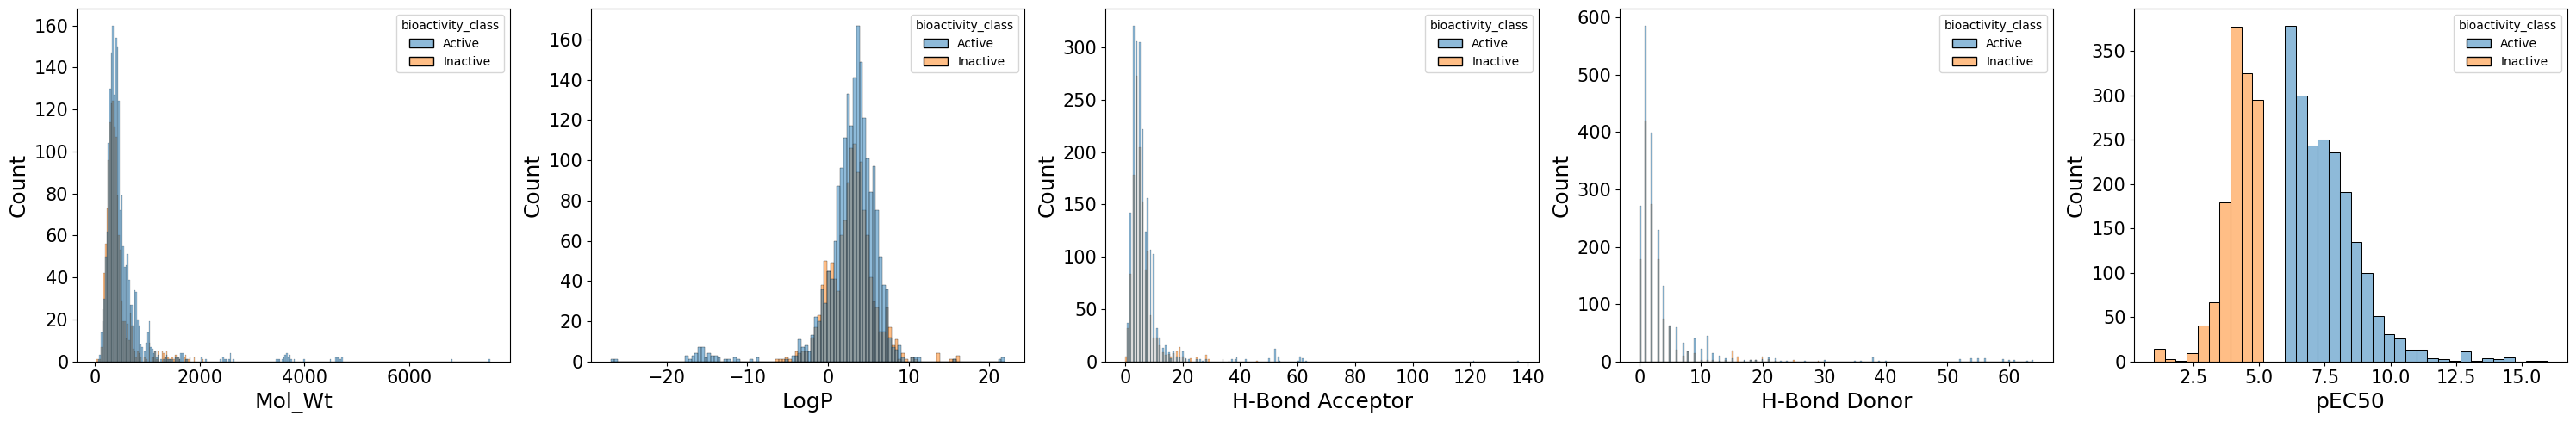

In [119]:
## Understanding Data Distribution
numerical_data = df_filtered_bioactivity.select_dtypes("number")
fig, ax = plt.subplots(nrows = 1, ncols = len(numerical_data.columns), figsize = (30,5))
ax = ax.ravel()
pos = 0
for col in numerical_data.columns:
    sns.histplot(data = df_filtered_bioactivity, x = col, hue = "bioactivity_class", ax = ax[pos])
    ax[pos].tick_params(axis = "x", labelsize = 15)
    ax[pos].tick_params(axis = "y", labelsize = 15)
    ax[pos].set_xlabel(ax[pos].get_xlabel(), fontsize = 18)
    ax[pos].set_ylabel(ax[pos].get_ylabel(), fontsize = 18)

    pos+=1
    
plt.tight_layout()
plt.show()

**Insights**

* Most of the compounds are of active nature.
* The molecular weight of most of the compounds lie below 5000.
* There is a clear distinction between the pEC50 values of Active and Inactive Compounds. pEC50 of active compounds is 6 and greater.
* Data is skewed

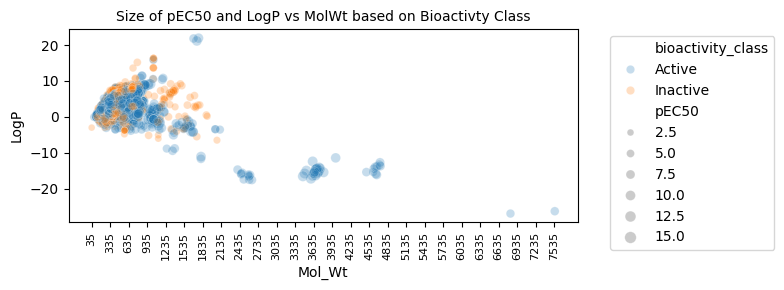

In [138]:
plt.figure(figsize = (8,3))
sns.scatterplot(x = df_filtered_bioactivity["Mol_Wt"], 
                y = df_filtered_bioactivity["LogP"], 
                size = df_filtered_bioactivity["pEC50"], 
                hue = df_filtered_bioactivity["bioactivity_class"],alpha = 0.25)
xticks = np.arange(df_filtered_bioactivity["Mol_Wt"].min(), df_filtered_bioactivity["Mol_Wt"].max(), step = 300)
plt.xticks(ticks = xticks, rotation =90, fontsize = 8)
plt.title("Size of pEC50 and LogP vs MolWt based on Bioactivty Class", fontsize = 10)
plt.legend(bbox_to_anchor = (1.05, 1))
plt.tight_layout()
plt.show()

**Insights**
* There is no specific distinction b/w Active and Inactive Based on Molecular Weight

# Statistical Test

## Mann - Whitney U Test

* **Purpose**: Used to assess the difference between two independent groups.
* **Fields of Application**: Economics, biological sciences, epidemiology.
* **Suitable Conditions**:
    - Groups have low numbers of individuals (usually less than 30).
    - Data are continuous.
    - Data are not normally distributed.


**Assumptions of Mann-Whitney U Test**

**Type of Variable**:
* The variable must be continuous (e.g., age, weight, height, heart rate).

**Data Distribution**:
* Assumes a non-Normal (skewed) distribution.
* If data are normally distributed, use the unpaired Student’s t-test instead.

**Shape of Distribution**:
* Data in both groups should have a similar shape.

**Sample Independence**:
* Groups should be two randomly selected independent samples with no relationship.
* If samples are paired, use a paired samples t-test instead.
  
**Sample Size**:
* Requires more than 5 observations in each group for a valid test.

Source: https://www.technologynetworks.com/informatics/articles/mann-whitney-u-test-assumptions-and-example-363425

In [141]:
def MannWhitneyUTest(dataframe, descriptor, alpha:float = 0.05):
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu

    ##Random Number Seed
    seed(42)
    ## Select the descriptor value for active bioactivity
    selected = dataframe[[descriptor, "bioactivity_class"]]
    active = selected[selected["bioactivity_class"] == "Active"][descriptor]

    ## Select the descriptor for inactive bioactivity
    inactive = selected[selected["bioactivity_class"] == "Inactive"][descriptor]

    ## Compare Sample: Are the two populations equal
    ##H0: Yes, they are equal
    ##H1: No, they are not equal
    
    stat, p = mannwhitneyu(active, inactive)
    print("Statistics = %.3f, p = %.3f" %(stat, p))

    ## Interpret
    if p>alpha:
        interpretation = "Same Distribution(Accept H0)"
    else:
        interpretation = "Different Distribution (Accept H1)"


    results = pd.DataFrame({
        "Descriptor": descriptor,
        "Statistics": stat,
        "p-val": p,
        "alpha":alpha,
        "Interpretation": interpretation}, index = [0])
    results.to_csv(f"mannwhitney_{descriptor}_acetylcholinesterase.csv")
    return results

In [142]:
for col in df_filtered_bioactivity.select_dtypes("number"):
    result = MannWhitneyUTest(df_filtered_bioactivity, col)
    print(result.to_string(), "\n")
    print("-"*50)
    
    

Statistics = 1592816.500, p = 0.000
  Descriptor  Statistics         p-val  alpha                      Interpretation
0     Mol_Wt   1592816.5  4.286915e-25   0.05  Different Distribution (Accept H1) 

--------------------------------------------------
Statistics = 1408073.000, p = 0.000
  Descriptor  Statistics     p-val  alpha                      Interpretation
0       LogP   1408073.0  0.000479   0.05  Different Distribution (Accept H1) 

--------------------------------------------------
Statistics = 1365898.000, p = 0.052
        Descriptor  Statistics     p-val  alpha                Interpretation
0  H-Bond Acceptor   1365898.0  0.052172   0.05  Same Distribution(Accept H0) 

--------------------------------------------------
Statistics = 1385966.500, p = 0.006
     Descriptor  Statistics     p-val  alpha                      Interpretation
0  H-Bond Donor   1385966.5  0.006367   0.05  Different Distribution (Accept H1) 

--------------------------------------------------
Statis

**Insights:**

* There is a significant difference between active and inactive based on Molecular Weight, LogP, H-Bond Donor and pEC50 parameters.
* H-Bond Acceptor parameter is same for both active and inactive cases.